# **Capstone project: Providing data-driven suggestions for HR**

## Description

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle

### Load dataset

In [3]:
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration and Cleaning

### Gather basic information about the data

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [6]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
for column in df0.columns:
    df0.rename(columns={column:column.lower()}, inplace=True)
df0.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)
df0.rename(columns={'time_spend_company': 'tenure'}, inplace=True)

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [8]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

In [9]:
df0.duplicated().sum()

3008

In [10]:
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
df1 = df0.drop_duplicates(keep='first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
df1.duplicated().sum()

0

### Check outliers

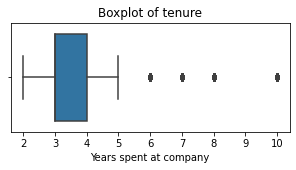

In [13]:
plt.figure(figsize=(5,2))
sns.boxplot(x=df1['tenure'])
plt.xlabel('Years spent at company')
plt.title('Boxplot of tenure')
plt.show()

In [14]:
q3 = df1['tenure'].quantile(0.75)
q1 = df1['tenure'].quantile(0.25)
iqr = q3-q1
upper_limit = q3 + 1.5*iqr
print('Number of outliers:', (df1['tenure'] > upper_limit).sum())

Number of outliers: 824


The main stakeholder is the HR department Salifort Motors. The aim of the project is to deterine which variables have the most impact on employee retention and develop a model to predict whether an employee is likely to leave Salifort Motors. The tenure variable has 824 outliers on the upper limit which may need to be cleaned based on the model implemented.

# Data Analysis

In [15]:
print(df1['left'].value_counts())
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Text(0.5, 1.0, 'Distribution of number of projects')

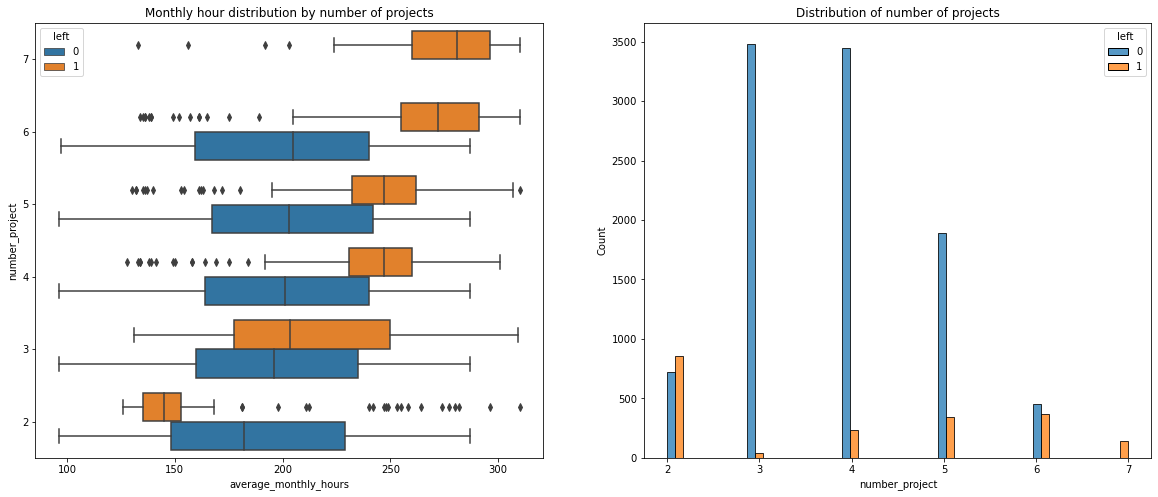

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hour distribution by number of projects')

sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', ax=ax[1])
ax[1].set_title('Distribution of number of projects')

On average, employees who left the company worked more monthly hours with the exception of the group of employees who worked on 2 projects. This could be due to the company assigning less work to employees who planned to leave, resulting in fewer projects and hours worked. Another observation is that all emplyees who worked on 7 projects left the company. This could indicate that a heavy workload is a reason for employeee leaving.

Text(0.5, 1.0, 'Distribution of monthly hours')

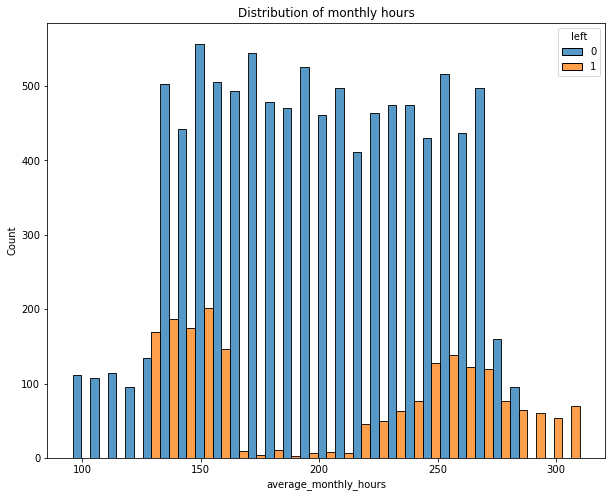

In [17]:
plt.figure(figsize=(10,8))
sns.histplot(data=df1, x='average_monthly_hours', hue='left', multiple='dodge')
plt.title('Distribution of monthly hours')

Employees who left the company tend to lie on the upper and lower extremes of average monthly hours worked. Again, this could indicate that employees who planned to leave were assigned a lighter workload. Additionally, employees with a heavier workload had a tendency to leave the company.

Text(0.5, 1.0, 'Distribution of tenure')

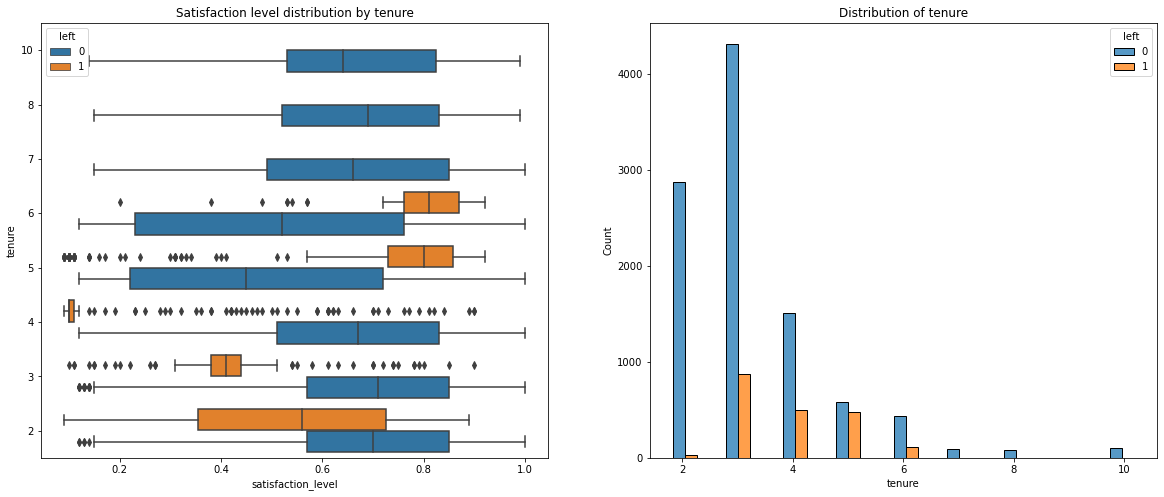

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction level distribution by tenure')

sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Distribution of tenure')

Employees with longe tenures that left the company tended to have higher satisfaction levels. For employees with 4 or less years at the company, the satisfaction level was lower for employees who left. Most employees have worked with the company between 2 to 4 years, and few employees have stayed for longer than 6 years. At the 4 years of working for the company, employee satisfaction for those who left is extremely low. This could indicate a point in which employees who are unhappy with the company feel the most dissatisfied and decide to no longer stay with the company.

Text(0.5, 1.0, 'Distribution of satisfaction')

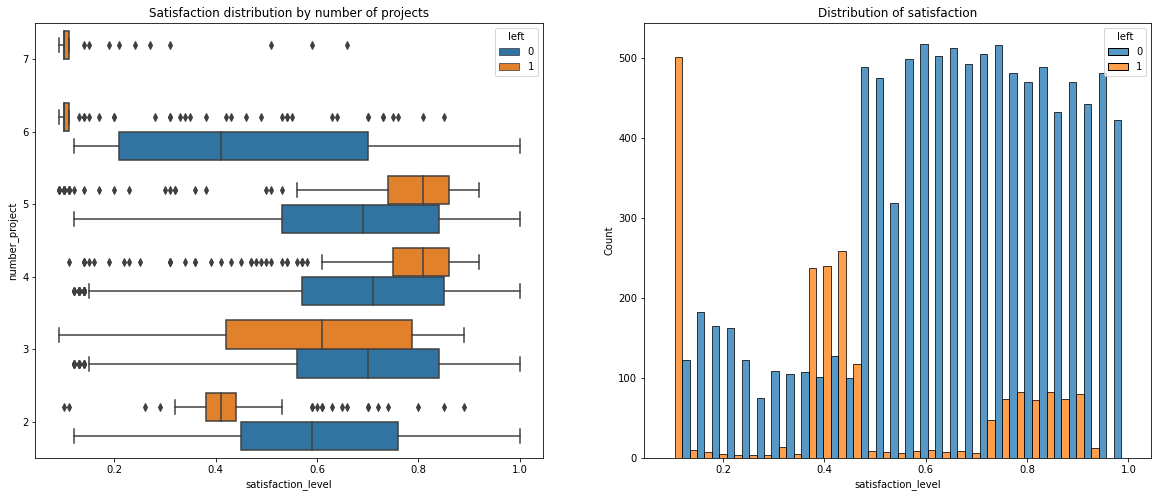

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

sns.boxplot(data=df1, x='satisfaction_level', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction distribution by number of projects')

sns.histplot(data=df1, x='satisfaction_level', hue='left', multiple='dodge', ax=ax[1])
ax[1].set_title('Distribution of satisfaction')

A large number of employees who left rated their satisfaction at the company on the lower end compared to employees who did not leave. Out of the employees who worked on 6 and 7 projects and left the company, employee satisfcation was extremely low. This could indicate that being assigned many projects is related to low satisfaction, which might result in the employee leaving the company.

Text(0.5, 1.0, 'Salary of people who stayed vs left')

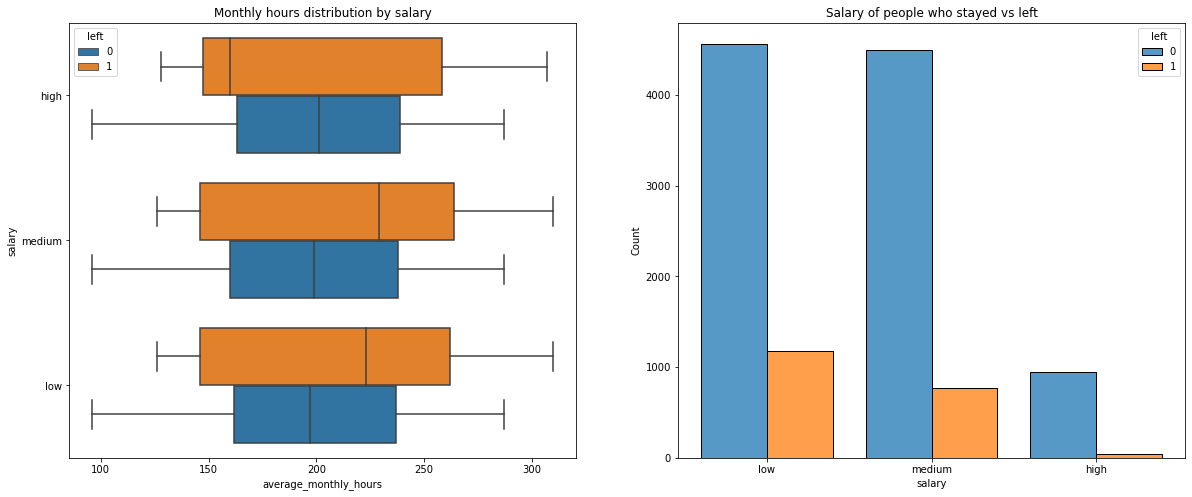

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.boxplot(data=df1, x='average_monthly_hours', y='salary', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours distribution by salary')

sns.histplot(data=df1, x='salary', hue='left', multiple='dodge', ax=ax[1], shrink=0.8)
ax[1].set_title('Salary of people who stayed vs left')

For low and medium salary classes, employees who left worked more monthly hours on average. Also, most of the employees at the company earn low and medium salaries. Employees with high salaries that left the company were assigned hours as they prepared to leave.

Text(0.5, 1.0, 'Employees who stayed vs left by department')

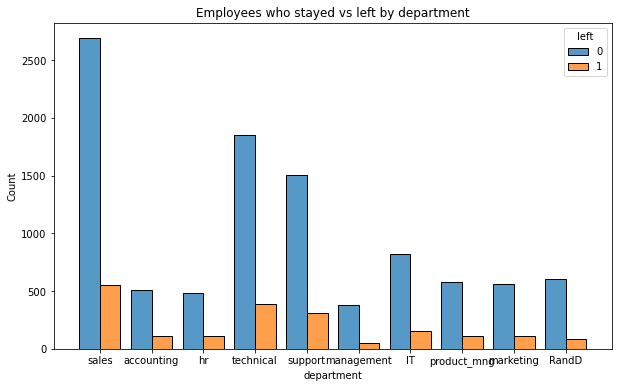

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='department', hue='left', multiple='dodge', shrink=0.8)
plt.title('Employees who stayed vs left by department')

Text(0.5, 1.0, 'Scatterplot of monthly hours and satisfaction')

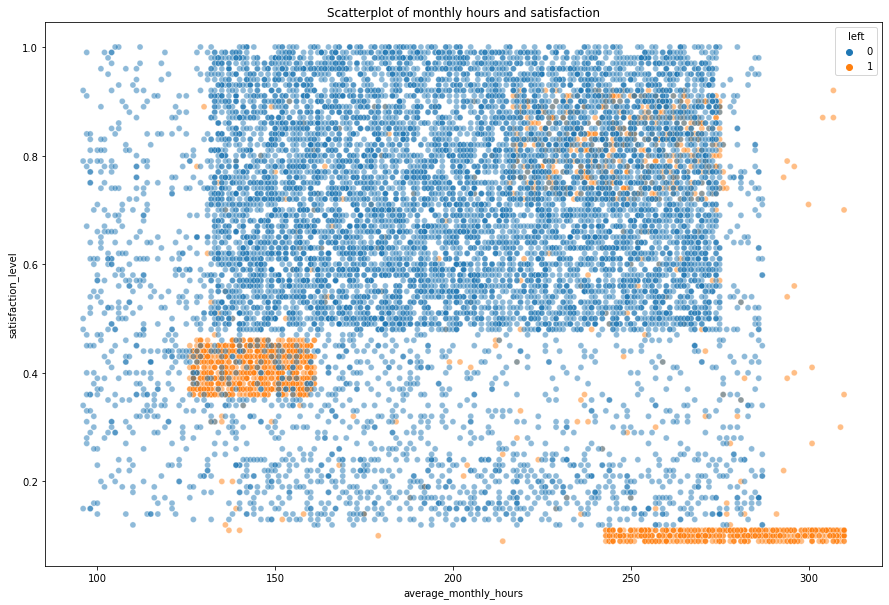

In [22]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5)
plt.title('Scatterplot of monthly hours and satisfaction')

There are three main clusters of employees who left: high monthly hours + low satisfaction, low monthly hours + medium satisfaction, high monthly hours + high satisfaction.

Text(0.5, 1.0, 'Scatterplot of monthly hours and evaluation score')

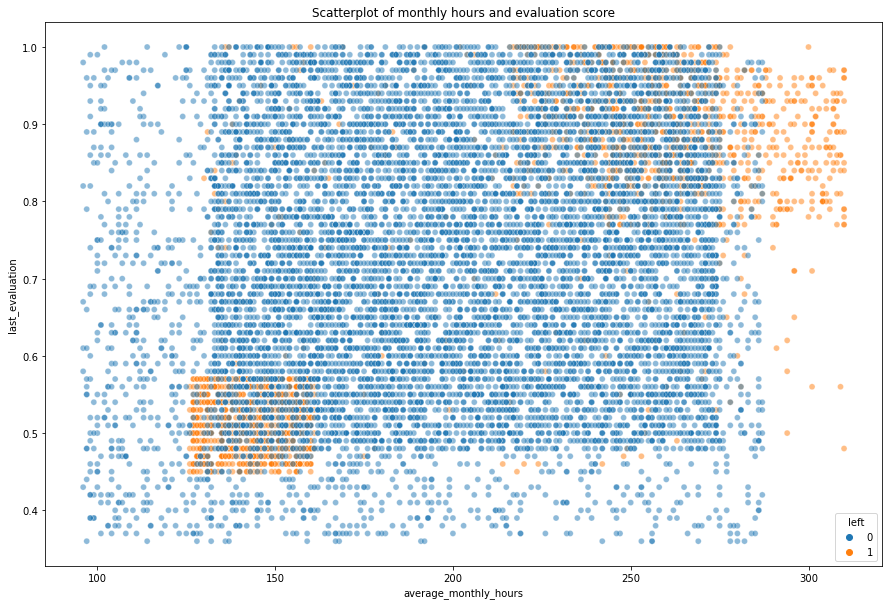

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.5)
plt.title('Scatterplot of monthly hours and evaluation score')

There are two clusters of employees who left: employees who earned high evaluation scores + worked longer hours, employees who earned average evaluation scores + worked fewer hours.

Text(0.5, 1.0, 'Scatterplot of monthly hours and promotion')

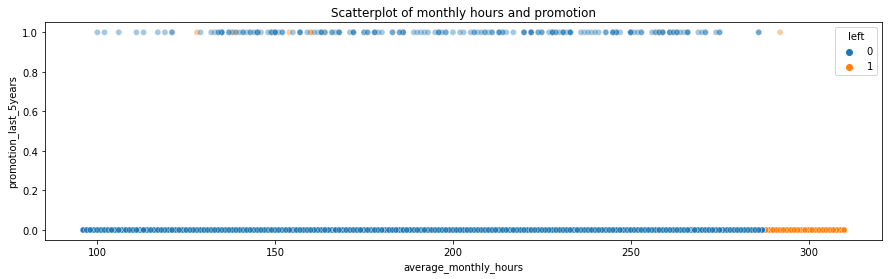

In [24]:
plt.figure(figsize=(15,4))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.title('Scatterplot of monthly hours and promotion')

Most of the employees who worked longer hours and did not receive a promotion within the last 5 years left the company. This could indicate that the amount of hours spent working did not contribute to an increase in pay or position, which caused employeess to leave.

Text(0.5, 1.0, 'Employee salaries by tenure')

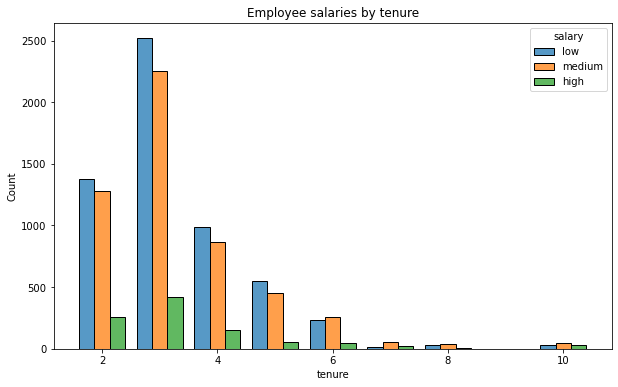

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='tenure', hue='salary', discrete=1, multiple='dodge', shrink=.8)
plt.title('Employee salaries by tenure')

Text(0.5, 1.0, 'Correlation heatmap')

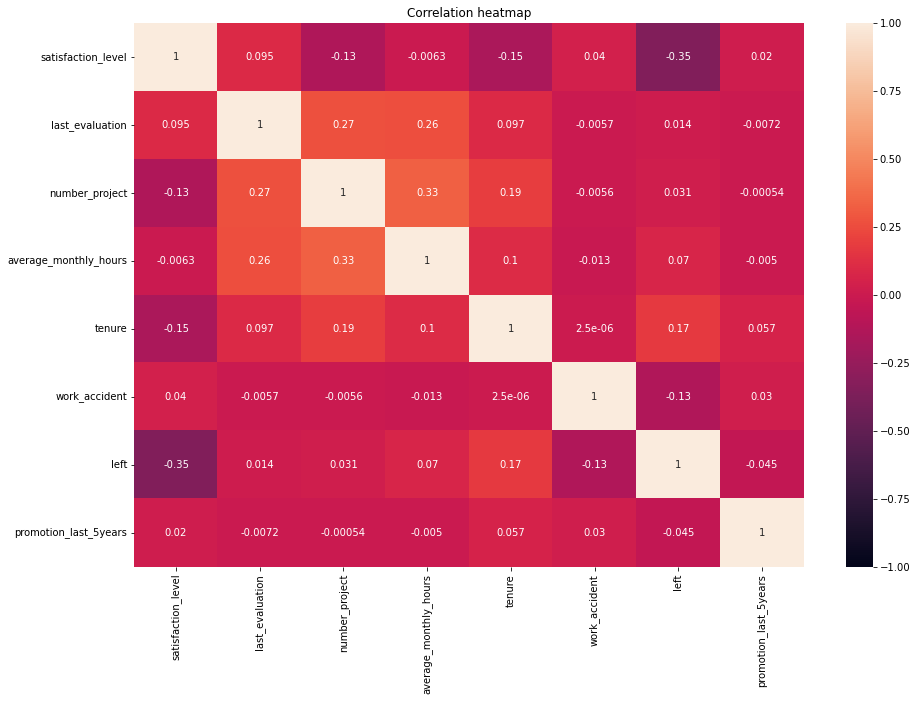

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df1.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Correlation heatmap')

Evaluation score, average monthly hours, and number of projects are positively correlated with each other. Many of the employees who left had a low satisfaction level, which is negatively correlated with workload. This suggests that employees who work more are more dissatisfied and are likely ot leave the company.

### Insights

Employees who feel overworked, as seen in the average monthly hours and number of projects, may feel dissatisfed and tend to leave the company. There are few employees who have stayed with the company for longer than 6 years, with most of the employees only having worked at the company for 2 to 3 years. 

# Model Construction

### Logistic Regression

In [52]:
df2 = df1.copy()
df2.loc[df2['tenure'] > q3 + 1.5*iqr, 'tenure'] = q3 + 1.5*iqr

In [28]:
data_majority = df2[df2['left'] == 0]
data_minority = df2[df2['left'] == 1]

data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=0)

df3 = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

print(df3['left'].value_counts())

0    10000
1    10000
Name: left, dtype: int64


In [53]:
### YOUR CODE HERE ###
X = df2.drop(['left'], axis=1)
y = df2['left']

In [54]:
X['salary'] = (
    X['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)
X = pd.get_dummies(X, drop_first=False)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3.0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,5.5,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4.0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5.0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3.0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=0)

In [56]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8393, 18) (3598, 18) (8393,) (3598,)


In [57]:
clf = LogisticRegression(random_state=0, max_iter=500)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred = clf.predict(X_test)

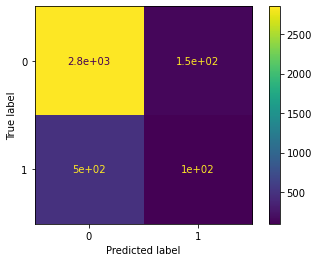

In [59]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()

In [71]:
print(df1['left'].value_counts())
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


Because the data is imbalanced with far more employees staying than leaving, the model has difficulty predicting employees who left. However, because the imbalance is not extreme, we will continue evaluating the model.

In [60]:
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % precision_score(y_test, y_pred))
print("Recall:", "%.6f" % recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % f1_score(y_test, y_pred))

Accuracy: 0.819900
Precision: 0.398406
Recall: 0.167504
F1 Score: 0.235849


In [61]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.85      0.95      0.90      3001
    Predicted would leave       0.40      0.17      0.24       597

                 accuracy                           0.82      3598
                macro avg       0.62      0.56      0.57      3598
             weighted avg       0.78      0.82      0.79      3598



### Decision Tree

In [62]:
tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 4, 6],
             'min_samples_split': [2, 4, 6]
             }
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='f1')

In [63]:
%%time

tree1.fit(X_train, y_train)

CPU times: user 2.72 s, sys: 3.31 ms, total: 2.73 s
Wall time: 2.73 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 4, 6],
                

In [79]:
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [65]:
cv_results = pd.DataFrame(tree1.cv_results_)


best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]


auc = best_estimator_results.mean_test_roc_auc
f1 = best_estimator_results.mean_test_f1
recall = best_estimator_results.mean_test_recall
precision = best_estimator_results.mean_test_precision
accuracy = best_estimator_results.mean_test_accuracy

print("AUC Score:", "%.6f" % auc)
print("F1 Score:", "%.6f" % f1)
print("Recall:", "%.6f" % recall)
print("Precision:", "%.6f" % precision)
print("Accuracy:", "%.6f" % accuracy)

AUC Score: 0.967542
F1 Score: 0.941714
Recall: 0.910327
Precision: 0.975376
Accuracy: 0.981294


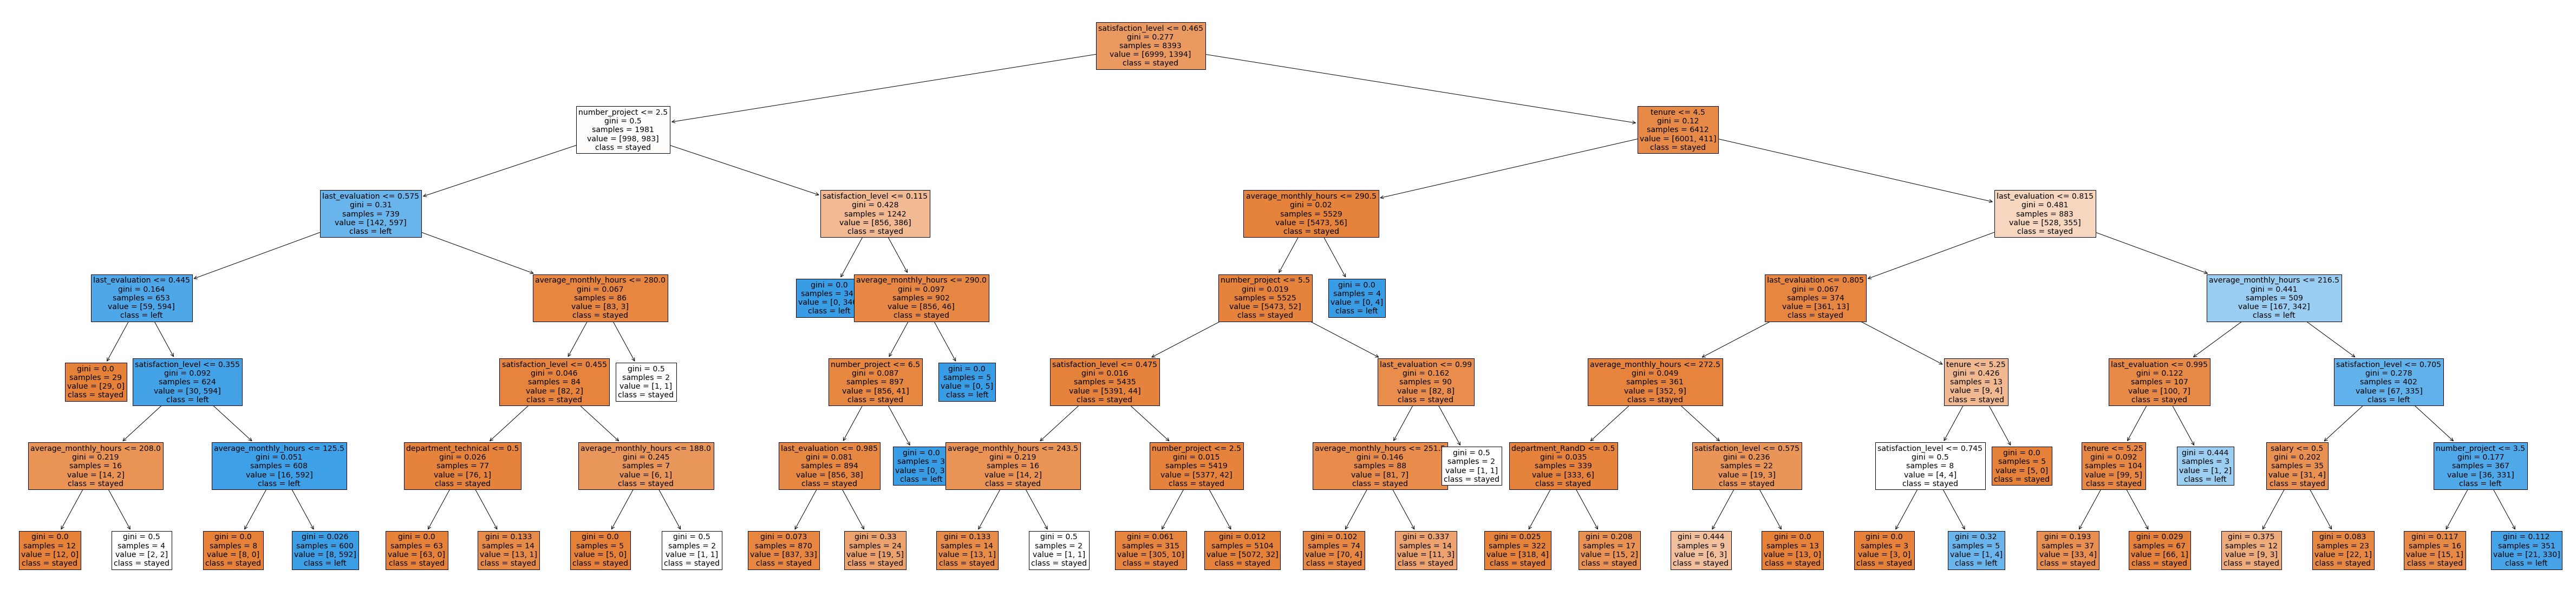

In [66]:
plt.figure(figsize=(85,20))
plot_tree(tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [67]:
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)
tree1_importances

,gini_importance
satisfaction_level,0.523095
last_evaluation,0.169061
number_project,0.126142
tenure,0.114625
average_monthly_hours,0.066520
salary,0.000327
department_RandD,0.000174
department_technical,0.000057
promotion_last_5years,0.000000
department_IT,0.000000


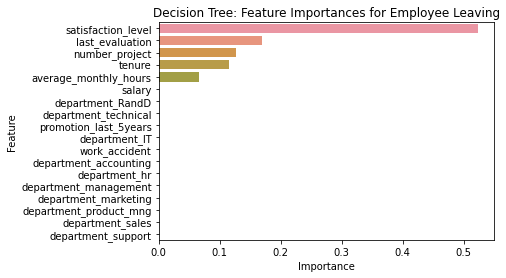

In [68]:
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

### Random Forest Model

In [69]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [70]:
%%time

rf1.fit(X_train, y_train)

CPU times: user 8min 48s, sys: 1.42 s, total: 8min 50s
Wall time: 8min 50s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [73]:
with open('rf1.pickle', 'wb') as to_write:
    pickle.dump(rf1, to_write)

In [74]:
with open('rf1.pickle', 'rb') as to_read:
    rf1 = pickle.load(to_read)

In [78]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [76]:
cv_results = pd.DataFrame(rf1.cv_results_)


best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]


auc = best_estimator_results.mean_test_roc_auc
f1 = best_estimator_results.mean_test_f1
recall = best_estimator_results.mean_test_recall
precision = best_estimator_results.mean_test_precision
accuracy = best_estimator_results.mean_test_accuracy

print("AUC Score:", "%.6f" % auc)
print("F1 Score:", "%.6f" % f1)
print("Recall:", "%.6f" % recall)
print("Precision:", "%.6f" % precision)
print("Accuracy:", "%.6f" % accuracy)

AUC Score: 0.972750
F1 Score: 0.944964
Recall: 0.911759
Precision: 0.980692
Accuracy: 0.982366


In [80]:
rf1_importances = pd.DataFrame(rf1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
rf1_importances = rf1_importances.sort_values(by='gini_importance', ascending=False)
rf1_importances

,gini_importance
satisfaction_level,0.466743
number_project,0.148509
last_evaluation,0.148062
tenure,0.108935
average_monthly_hours,0.104158
salary,0.004860
department_technical,0.003408
department_sales,0.002446
department_support,0.002439
department_accounting,0.001534


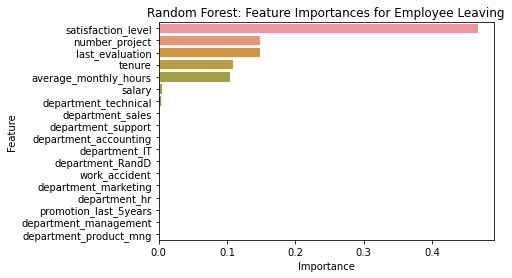

In [83]:
sns.barplot(data=rf1_importances, x="gini_importance", y=rf1_importances.index, orient='h')
plt.title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

# Results and Evaluation

### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 78%, recall of 82%, f1-score of 79% (all weighted averages), and accuracy of 82%, on the test set.

**Tree-based Machine Learning**

The decision tree model achieved AUC of 96.8%, precision of 97.5%, recall of 91.0%, f1-score of 94.2%, and accuracy of 98.1%, on the test set. The random forest bodel achieved AUC of 97.3%, precision of 98.1%, recall of 91.2%, f1-score of 94.5%, and accuracy of 98.2%, on the test set. The random forest model performed slightly better than the decision tree.

### Conclusion, Recommendations, Next Steps

The model and feature importances supports that employees at the company are dissatisfied because of factors related to workload. To increase employee retention, it is recommended that employees be assigned fewer projects and lighter workloads to allow for decreased working hours. If decreased workload is not possible, employees should be incentivized and rewarded such as through higher pay or promotions. Additionally, higher evaluation score seems tied to working overtime, which should not be the case as employees who worked an appropriate number of hours should be rewarded accordingly as well. It is also worth looking into why employees who left after four years have an abnormally low satisfaction level.